### Modelo_uno. ( Mejorando modelo 0 )

    - Normalizacion - Gestionamos las variable numericas en euros Saldo Captacion, FFII y PP



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/cleanned_data/df.tfm')

In [3]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [4]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

### Normalizamos las variables numericas excepto 

In [6]:
scaler = MinMaxScaler()

In [7]:
df_datos_numericos = data = df.select_dtypes('number')

In [8]:
columnas_datos_numericos = df_datos_numericos.columns

In [9]:
df_normalizado = scaler.fit_transform(df_datos_numericos)

In [10]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [11]:
df_normalizado.head(2)

,cliente,saldo_captacion,gestor,codigo_cartera,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,edad,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,0.000000,0.258207,0.316956,0.140366,0.001689,0.415566,0.031101,1.0,1.0,1.0,1.0,1.0,0.584746,0.1,0.098619,0.0,0.0,0.0,1.0,0.0
1,0.000002,0.223408,0.316956,0.140366,0.001689,0.355362,0.000000,0.0,0.0,0.0,1.0,1.0,0.686441,0.1,0.098619,0.0,0.0,0.0,0.0,0.0


In [13]:
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y= df_normalizado['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8576106 (451374, 19)
Datos y = 451374 (451374,)


In [17]:
modelo1 = LogisticRegression(solver = 'newton-cg')

In [18]:
modelo1.fit(X,y)

LogisticRegression(solver='newton-cg')

In [19]:
modelo1.predict(X)

array([1., 0., 0., ..., 0., 0., 0.])

In [20]:
# recordar porque he utilizado seed 7 en random_state
test_size = 0.2
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [21]:
modelo1.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [22]:
modelo1.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
modelo1.predict_proba(X_test)[:, 1]

array([0.10519022, 0.17919336, 0.24050696, ..., 0.15976316, 0.40287131,
       0.03077135])

In [24]:
#importamos librerias
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


[[77794   732]
 [10928   821]]


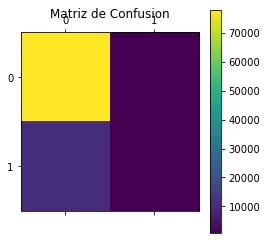

In [25]:
# Imprimimos matriz de confusion para ver los datos iniciales y luego sacar las metricas
matriz_confusion_modelo1 = confusion_matrix(y_test,modelo1.predict(X_test))
print(matriz_confusion_modelo1)
pl.matshow(confusion_matrix(y_test,modelo1.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [26]:
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo1.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo1.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo1.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo1.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo1.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo1.predict(X_test)))

accuracy_score =  0.8708391027416228
precision = 0.5286542176432711
recall = 0.06987828751383096
f1_score = 0.12344008419786498
roc_auc_score = 0.7810038633192866
classification_report
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     78526
         1.0       0.53      0.07      0.12     11749

    accuracy                           0.87     90275
   macro avg       0.70      0.53      0.53     90275
weighted avg       0.83      0.87      0.83     90275



roc_auc_score = 0.7810038633192866


Text(0, 0.5, 'tpr')

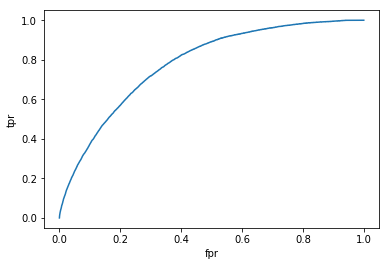

In [28]:
print('roc_auc_score =', roc_auc_score(y_test,modelo1.predict_proba(X_test)[:, 1]))
fpr, tpr, threshold = roc_curve(y_test,modelo1.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')